In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle


In [2]:
#Importing the dataset
df = pd.read_csv('mldataset2.csv')

In [3]:
#printing the dataset
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
#Printing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#deleting useless columns (step, nameOrig, nameDest, isFlaggedFraud)
df = df.drop(['step', 'isFlaggedFraud','nameOrig','nameDest'], axis=1)

In [6]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [7]:
#the rows with newbalanceDest are the same with nameDest = 'M*******', the dataset owner claims that there are no information for Merchants
df = df[df['newbalanceDest'] != 0]

In [8]:
#Printing the dataset (the number of rowns is reduced from 6362620 rows to 3923187 rows)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
9,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0
10,DEBIT,9644.94,4465.00,0.00,10845.00,157982.12,0
15,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0
21,DEBIT,9302.79,11299.00,1996.21,29832.00,16896.70,0
24,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,63416.99,0.00,276433.18,339850.17,1
6362613,CASH_OUT,1258818.82,1258818.82,0.00,503464.50,1762283.33,1
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1


In [9]:
#checking if there are Null Values
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
#checking if there are duplicated values
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 9          False
10         False
15         False
21         False
24         False
           ...  
6362611    False
6362613    False
6362615    False
6362617    False
6362619    False
Length: 3923187, dtype: bool>

In [11]:
#Replacing the categorical Feature 'type' with the integers 1, 2, 3 and 4
df = df.replace('DEBIT',1)
df = df.replace('CASH_OUT',2)
df = df.replace('TRANSFER',3)
df = df.replace('CASH_IN',4)

In [12]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
9,1,5337.77,41720.00,36382.23,41898.00,40348.79,0
10,1,9644.94,4465.00,0.00,10845.00,157982.12,0
15,2,229133.94,15325.00,0.00,5083.00,51513.44,0
21,1,9302.79,11299.00,1996.21,29832.00,16896.70,0
24,3,311685.89,10835.00,0.00,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362611,2,63416.99,63416.99,0.00,276433.18,339850.17,1
6362613,2,1258818.82,1258818.82,0.00,503464.50,1762283.33,1
6362615,2,339682.13,339682.13,0.00,0.00,339682.13,1
6362617,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1


In [13]:
#To make sure all the 'type' values are integers 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923187 entries, 9 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 239.5 MB


In [14]:
df.value_counts('isFraud')

isFraud
0    3919065
1       4122
dtype: int64

In [15]:
df.corr()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.040264,0.507613,0.522715,0.056905,0.030600,-0.025002
amount,0.040264,1.000000,-0.048067,-0.051534,0.262117,0.437336,0.051565
oldbalanceOrg,0.507613,-0.048067,1.000000,0.999213,0.014833,-0.012701,0.001393
newbalanceOrig,0.522715,-0.051534,0.999213,1.000000,0.016583,-0.012748,-0.011859
oldbalanceDest,0.056905,0.262117,0.014833,0.016583,1.000000,0.974958,-0.005404
newbalanceDest,0.030600,0.437336,-0.012701,-0.012748,0.974958,1.000000,0.004045
isFraud,-0.025002,0.051565,0.001393,-0.011859,-0.005404,0.004045,1.000000


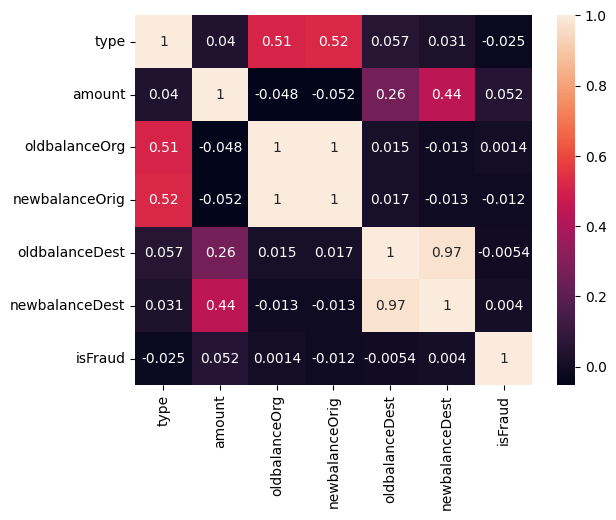

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
X = df.drop(["isFraud"], axis=1)
y = df["isFraud"]

In [18]:
print(X)

         type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
9           1     5337.77       41720.00        36382.23        41898.00   
10          1     9644.94        4465.00            0.00        10845.00   
15          2   229133.94       15325.00            0.00         5083.00   
21          1     9302.79       11299.00         1996.21        29832.00   
24          3   311685.89       10835.00            0.00         6267.00   
...       ...         ...            ...             ...             ...   
6362611     2    63416.99       63416.99            0.00       276433.18   
6362613     2  1258818.82     1258818.82            0.00       503464.50   
6362615     2   339682.13      339682.13            0.00            0.00   
6362617     2  6311409.28     6311409.28            0.00        68488.84   
6362619     2   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  
9              40348.79  
10            157982.12  
15       

In [19]:
print(y)

9          0
10         0
15         0
21         0
24         0
          ..
6362611    1
6362613    1
6362615    1
6362617    1
6362619    1
Name: isFraud, Length: 3923187, dtype: int64


In [20]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
9,1,5337.77,41720.00,36382.23,41898.00,40348.79,0
10,1,9644.94,4465.00,0.00,10845.00,157982.12,0
15,2,229133.94,15325.00,0.00,5083.00,51513.44,0
21,1,9302.79,11299.00,1996.21,29832.00,16896.70,0
24,3,311685.89,10835.00,0.00,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362611,2,63416.99,63416.99,0.00,276433.18,339850.17,1
6362613,2,1258818.82,1258818.82,0.00,503464.50,1762283.33,1
6362615,2,339682.13,339682.13,0.00,0.00,339682.13,1
6362617,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [22]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=44)

In [23]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [24]:
predictions = rf_model.predict(X_test)

In [25]:
model_file = "antilaundering.pkl"

In [26]:
with open(model_file, 'wb') as file:  
    pickle.dump(rf_model, file)

In [27]:
rf_model

RandomForestClassifier(n_estimators=50, random_state=44)